### what features affect house prices

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Exploratory Data Analysis

In [65]:
df = pd.read_csv('housing.csv')
print(df)

        price  lotsize  bedrooms  bathrms  stories driveway  garagepl
0     42000.0     5850         3        1        2      yes         1
1     38500.0     4000         2        1        1      yes         0
2     49500.0     3060         3        1        1      yes         0
3     60500.0     6650         3        1        2      yes         0
4     61000.0     6360         2        1        1      yes         0
..        ...      ...       ...      ...      ...      ...       ...
541   91500.0     4800         3        2        4      yes         0
542   94000.0     6000         3        2        4      yes         0
543  103000.0     6000         3        2        4      yes         1
544  105000.0     6000         3        2        2      yes         1
545  105000.0     6000         3        1        2      yes         1

[546 rows x 7 columns]


In [43]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'garagepl'],
      dtype='object')

In [46]:
df.head(10)

,price,lotsize,bedrooms,bathrms,stories,driveway,garagepl
0,42000.0,5850,3,1,2,yes,1
1,38500.0,4000,2,1,1,yes,0
2,49500.0,3060,3,1,1,yes,0
3,60500.0,6650,3,1,2,yes,0
4,61000.0,6360,2,1,1,yes,0
5,66000.0,4160,3,1,1,yes,0
6,66000.0,3880,3,2,2,yes,2
7,69000.0,4160,3,1,3,yes,0
8,83800.0,4800,3,1,1,yes,0
9,88500.0,5500,3,2,4,yes,1


## Defining Independent and Dependent Variables

In [10]:
# dependent = ['price']

# independent = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway','recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea']

## Data Exploration

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [14]:
df['driveway'].unique() #get unique values of strings / objects

array(['yes', 'no'], dtype=object)

### Handling Missing Data

In [15]:
df.isnull().sum()

price       0
lotsize     0
bedrooms    0
bathrms     0
stories     0
driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
garagepl    0
prefarea    0
dtype: int64

### Data Exporation and Visualization

In [16]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\obasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


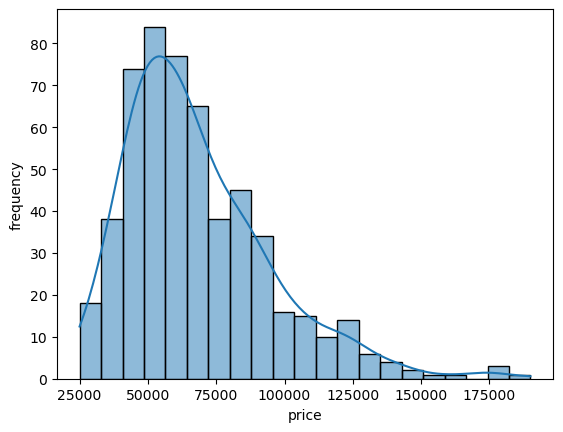

In [21]:
sns.histplot(df['price'], kde=True)
plt.ylabel('frequency')
plt.show()

### Inter-Quartile-Range for removing outliers

In [26]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1 #remove values that are above the 75th percentile and below the 25th

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_1 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df.shape)
print("New data shape without outliers:", df_no_outliers_1.shape)

Original data shape: (546, 12)
New data shape without outliers: (531, 12)


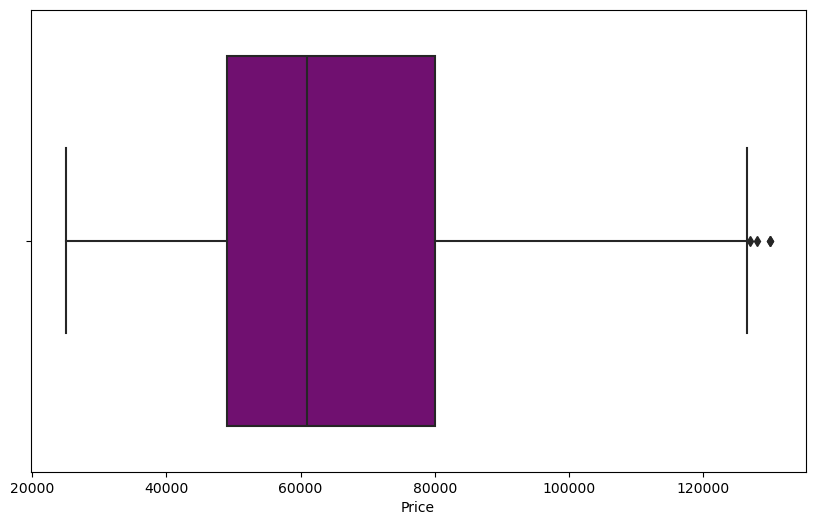

In [29]:
# use boxplot to detect outliers

plt.figure(figsize=(10,6))
sns.boxplot(x=df_no_outliers_1['price'], color='purple')
plt.xlabel('Price')
plt.show()

In [31]:
Q1 = df_no_outliers_1['price'].quantile(0.25)
Q3 = df_no_outliers_1['price'].quantile(0.75)

IQR = Q3 - Q1 #remove values that are above the 75th percentile and below the 25th

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers_2 = df_no_outliers_1[(df_no_outliers_1['price'] >= lower_bound) & (df_no_outliers_1['price'] <= upper_bound)]

# Check the shape of the data before and after removal of outliers
print("Original data shape:", df_no_outliers_1.shape)
print("New data shape without outliers:", df_no_outliers_2.shape)

Original data shape: (531, 12)
New data shape without outliers: (527, 12)


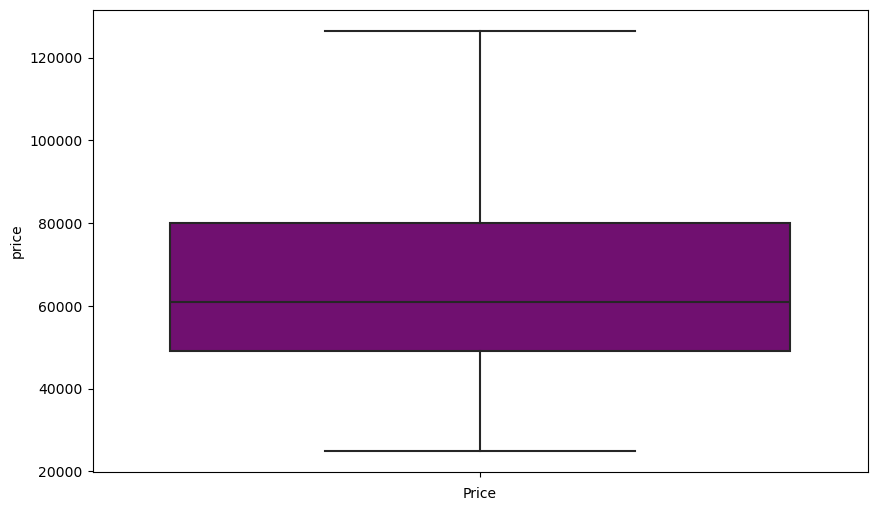

In [79]:
# use boxplot to detect outliers

plt.figure(figsize=(10,6))
sns.boxplot(y=df_no_outliers_2['price'], color='purple')
plt.xlabel('Price')
plt.show()

In [33]:
df = df_no_outliers_2

# Corellation Heatmap

In [47]:
df.corr(numeric_only=True)

,price,lotsize,bedrooms,bathrms,stories,garagepl
price,1.000000,0.535796,0.366447,0.516719,0.421190,0.383302
lotsize,0.535796,1.000000,0.151851,0.193833,0.083675,0.352872
bedrooms,0.366447,0.151851,1.000000,0.373769,0.407974,0.139117
bathrms,0.516719,0.193833,0.373769,1.000000,0.324066,0.178178
stories,0.421190,0.083675,0.407974,0.324066,1.000000,0.043412
garagepl,0.383302,0.352872,0.139117,0.178178,0.043412,1.000000


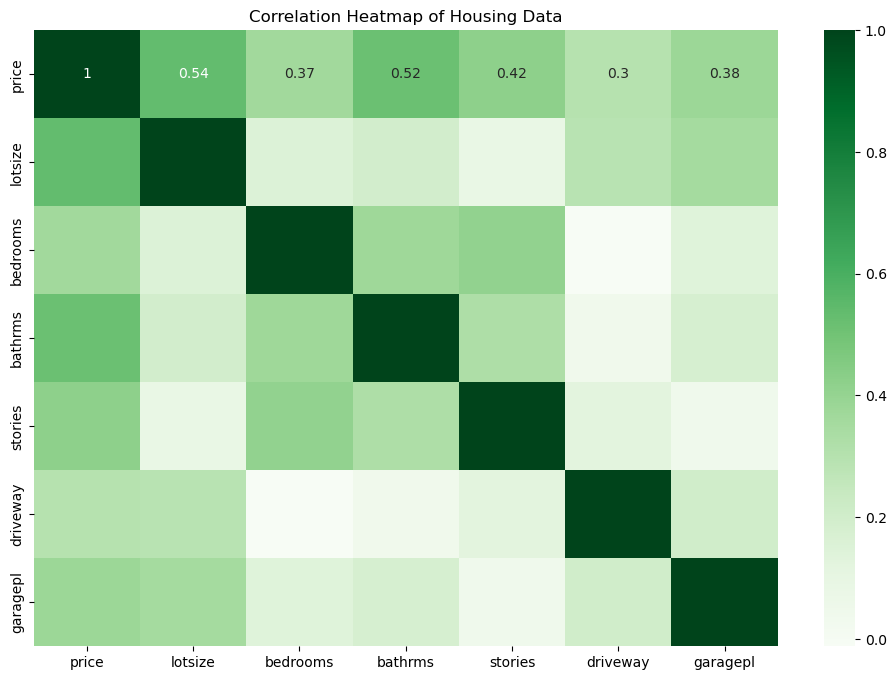

In [78]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

## Change text values to numericvalues

In [54]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'garagepl'],
      dtype='object')

In [70]:
####
#change text to value
#####

#driveway_dummies = pd.get_dummies(df['driveway'], prefix='driveway')
#df = pd.concat([df.drop("driveway", axis =1), driveway_dummies], axis=1)
#driveway_dummies

df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)


In [68]:
df.head(30)

,price,lotsize,bedrooms,bathrms,stories,driveway,garagepl
0,42000.0,5850,3,1,2,1,1
1,38500.0,4000,2,1,1,1,0
2,49500.0,3060,3,1,1,1,0
3,60500.0,6650,3,1,2,1,0
4,61000.0,6360,2,1,1,1,0
5,66000.0,4160,3,1,1,1,0
6,66000.0,3880,3,2,2,1,2
7,69000.0,4160,3,1,3,1,0
8,83800.0,4800,3,1,1,1,0
9,88500.0,5500,3,2,4,1,1


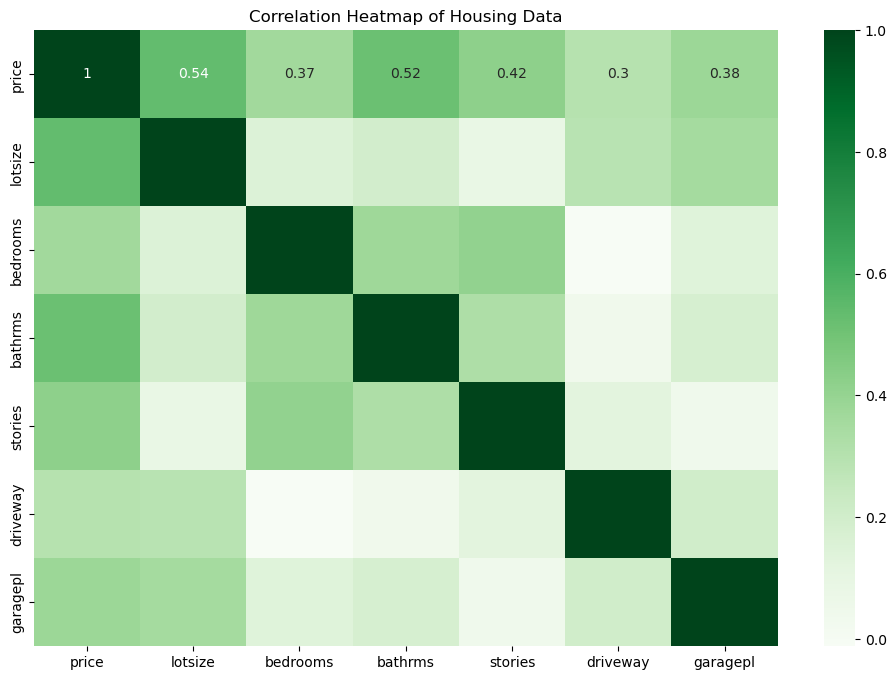

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()

# Split data

In [72]:
df.columns


Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'garagepl'],
      dtype='object')

In [80]:
# Define your features (independent variables) and target (dependent variable)
features = ['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway','garagepl']
target = ["price"]

X = df[features]
y = df[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 436 samples
Test set size: 110 samples


# Training and Testing Linear regression using stats model api

In [81]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default
X_train_const = sm.add_constant(X_train)
X_train_const


,const,lotsize,bedrooms,bathrms,stories,driveway,garagepl
402,1.0,6825,3,1,1,1,0
249,1.0,3450,3,1,2,1,0
542,1.0,6000,3,2,4,1,0
106,1.0,3720,2,1,1,0,0
398,1.0,7000,3,1,1,1,2
...,...,...,...,...,...,...,...
152,1.0,3600,2,2,2,1,1
396,1.0,6710,3,2,2,1,1
337,1.0,7500,3,3,1,1,2
311,1.0,4995,4,2,1,1,0


In [82]:
# ols = ordinary least squares


# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())


# R-squared: == goodness of the fit i.e is the total % of data that the independent variable canexplain out of the different variations
# if Adj. R-squared is the same you are good
# if F-statistic is large or Prob (F-statistic) is 0 then it means thAT All yur variables jointly are statistically significant

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     97.42
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           6.38e-77
Time:                        14:54:16   Log-Likelihood:                -4880.9
No. Observations:                 436   AIC:                             9776.
Df Residuals:                     429   BIC:                             9804.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6953.1636   4255.781     -1.634      0.1

## checking OLS assumptions

In [84]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

231    92735.397707
291    63586.732624
348    65828.547160
341    53585.512415
215    45890.017758
           ...     
289    44396.512403
445    96372.745779
370    71297.539834
480    76093.642145
24     51317.236668
Length: 110, dtype: float64

### linearity

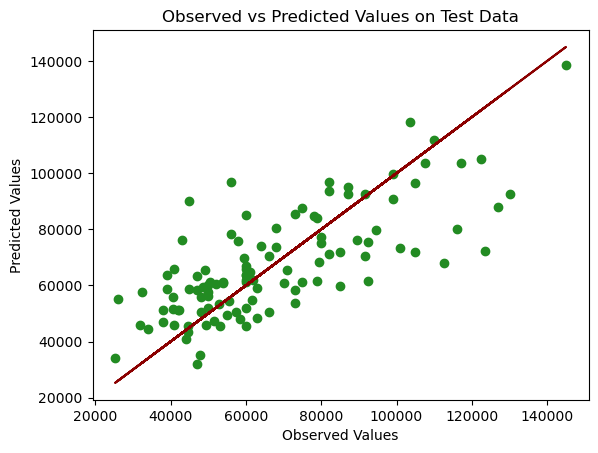

In [85]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()


### Random Sample

In [89]:
# Calculate the mean of the residuals
## Residuals are the differences between the observed values and the values predicted by the regression model.
mean_residuals = np.mean(model_fitted.resid)

np.round(mean_residuals,2)


0.0

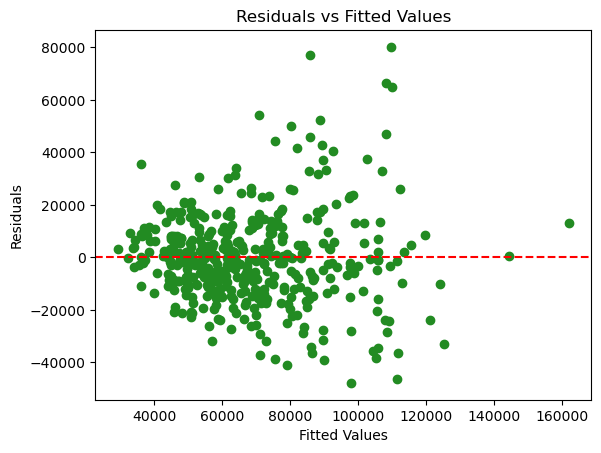

In [88]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


#we need to ensure we dont find a pattern


### Exogeneity

In [90]:
# Exogeneity refers to the assumption that the predictor variables in a regression model are not correlated with the error term (residuals) of the model.
# Violations of the exogeneity assumption can lead to biased parameter estimates and incorrect inferences.

In [91]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')


Correlation between residuals and lotsize: 0.0
Correlation between residuals and bedrooms: -0.0
Correlation between residuals and bathrms: 0.0
Correlation between residuals and stories: 0.0
Correlation between residuals and driveway: 0.0
Correlation between residuals and garagepl: 0.0


### Homoskedasticty

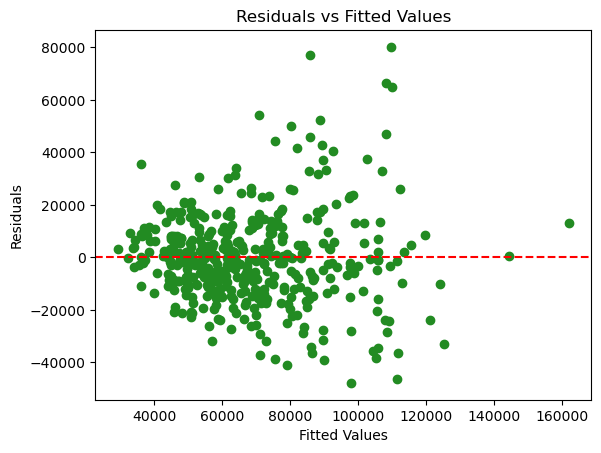

In [92]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

In [ ]:
# Random Scatter:
#If the residuals are randomly scattered around the horizontal line at zero, it suggests that the assumptions of homoscedasticity and linearity are met.

#Homoscedasticity means that the variance of the residuals is constant across all levels of the independent variables.

#Patterns or Shapes:
#If the residuals display a pattern (e.g., a curve) or form a funnel shape where the spread increases or decreases systematically with fitted values, it suggests the presence of heteroscedasticity.
#Heteroscedasticity occurs when the variance of the residuals changes systematically with the level of the independent variables, violating the assumption of homoscedasticity.

# using sci kit learn
